Dispositivo #1 [SN:210321B5D136, hdwf=1] connesso!
Configurazione #1


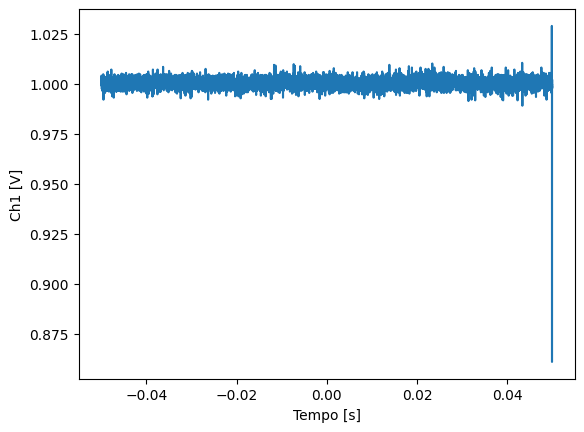

In [4]:
import tdwf # importiamo il modulo...
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time 
#matplotlib.use('TkAgg')

ad2 = tdwf.AD2() # connessione all’hardware
 
 
scope = tdwf.Scope(ad2.hdwf) # inizializzazione oscilloscopio
scope.fs = 1e5 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 10000 # => acquisizione impostata a 1000 punti - cambiare numero di punti piuttosto che frequenza
 
scope.ch1.rng = 5 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 50 # range Ch2 su [-25,+25]
 
 
scope.ch1.avg = False # attiva media su Ch1


wgen = tdwf.WaveGen(ad2.hdwf) # inizializzazione generatore
wgen.w1.config(offs=1, func=tdwf.funcDC) # => imposta valore DC a 1V, corrisponde ad una forma d'onda nulla (funcDC)
wgen.w1.start() # => avvia riproduzione
time.sleep(0.5) #tra avvio del segnale ed acquisizione

scope.sample() # Avvio acquisizione

plt.plot(scope.time.vals, scope.ch1.vals, '-')
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

plt.show()

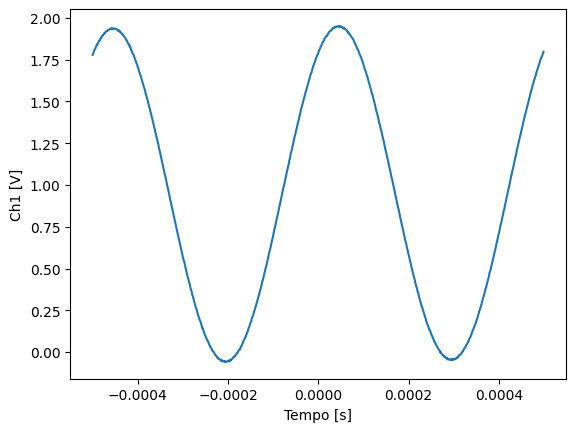

In [5]:
scope.fs = 1e6 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 1000 # => acquisizione impostata a 1000 punti - cambiare numero di punti piuttosto che frequenza
 
wgen = tdwf.WaveGen(ad2.hdwf) # inizializzazione generatore
wgen.w1.config(offs=1, func=tdwf.funcSine, freq=2e3) # => imposta valore DC a 1V, corrisponde ad una forma d'onda sinusoidale (funcSine)
wgen.w1.start() # => avvia riproduzione

scope.sample() # Avvio acquisizione

plt.plot(scope.time.vals, scope.ch1.vals, '-')
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

plt.show() 

ok funziona, bisogna giocare con frequenza e numero di punti per fare qualche altra acquisizione

## **Task 5 Obiettivi:**
- dimensionare correttamente il circuito (rapporto di divisione non molto minore di 1)


Per dimensionare il circuito, abbiamo scelto due resistenze entrambe nell'ordine del k$\Ohm$, più distanti possibile fra loro per rendere il denominatore il più piccolo possibile, in modo da avere un rapporto di divisione non molto minore di 1. Abbiamo scelto quindi R1=1 k$\Ohm$ e R2=3.3k$\Ohm$, che ci danno un rapporto di divisione di circa 0.767.



In [6]:
import tdwf # importiamo il modulo...
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time 
#matplotlib.use('TkAgg')

ad2 = tdwf.AD2() # connessione all’hardware
 
 
scope = tdwf.Scope(ad2.hdwf) # inizializzazione oscilloscopio

Dispositivo #1 [SN:210321B5D136, hdwf=1] connesso!
Configurazione #1


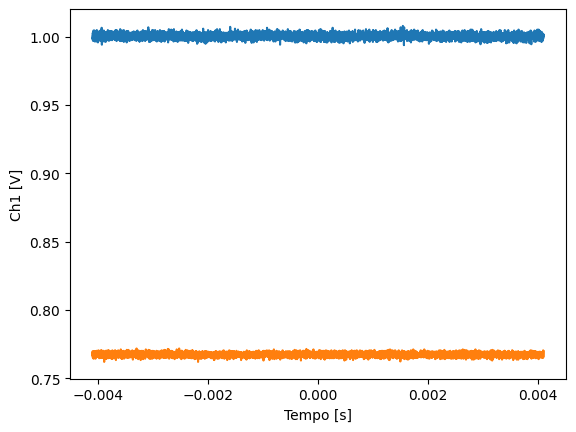

In [7]:
scope.fs = 1e6 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 8192 # => acquisizione impostata a 1000 punti - cambiare numero di punti piuttosto che frequenza
 
scope.ch1.rng = 5 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 5 # range Ch2 su [-25,+25]
 
 
scope.ch1.avg = False # attiva media su Ch1


wgen = tdwf.WaveGen(ad2.hdwf) # inizializzazione generatore
wgen.w1.config(offs=1, func=tdwf.funcDC) # => imposta valore DC a 1V, corrisponde ad una forma d'onda nulla (funcDC)
wgen.w1.start() # => avvia riproduzione
time.sleep(0.5) #tra avvio del segnale ed acquisizione

scope.sample() # Avvio acquisizione

plt.plot(scope.time.vals, scope.ch1.vals, '-', label = 'Ch1')
plt.plot(scope.time.vals, scope.ch2.vals, '-', label = 'Ch2')
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

data = np.column_stack((scope.time.vals,scope.ch1.vals,scope.ch2.vals))
np.savetxt("data-per-distribuzioni.txt", data, delimiter="\t")

plt.show()

Quanto ci aspettavamo.

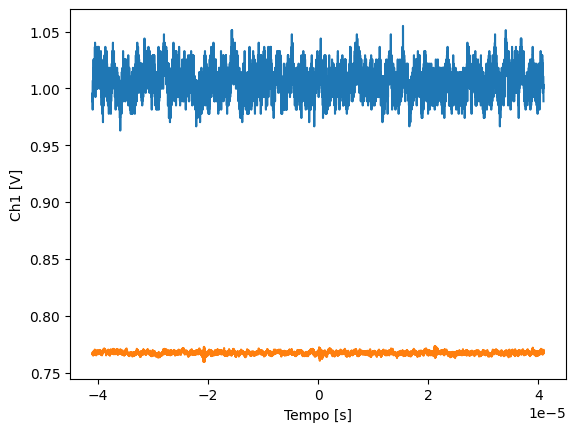

In [ ]:
scope.ch1.rng = 50 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 5 # range Ch2 su [-25,+25]
 
 
scope.ch1.avg = False # attiva media su Ch1


wgen = tdwf.WaveGen(ad2.hdwf) # inizializzazione generatore
wgen.w1.config(offs=1, func=tdwf.funcDC) # => imposta valore DC a 1V, corrisponde ad una forma d'onda nulla (funcDC)
wgen.w1.start() # => avvia riproduzione
time.sleep(0.5) #tra avvio del segnale ed acquisizione

scope.sample() # Avvio acquisizione

plt.plot(scope.time.vals, scope.ch1.vals, '-', label = 'Ch1')
plt.plot(scope.time.vals, scope.ch2.vals, '-', label = 'Ch2')
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

plt.show()

Diminuisce la risoluzione in accordo con quanto visto sulla risoluzione al variare del range.

Dispositivo #1 [SN:210321B5D136, hdwf=1] connesso!
Configurazione #1

Acquisizione per DC = -2.00 V
Rapporto medio Ch2/Ch1 = 0.766


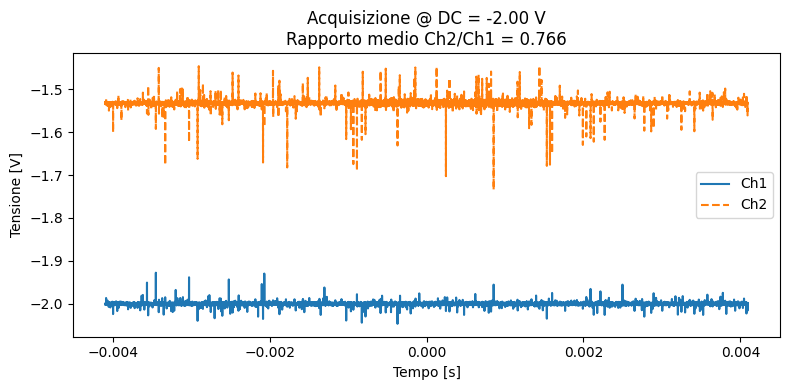


Acquisizione per DC = -1.56 V
Rapporto medio Ch2/Ch1 = 0.766


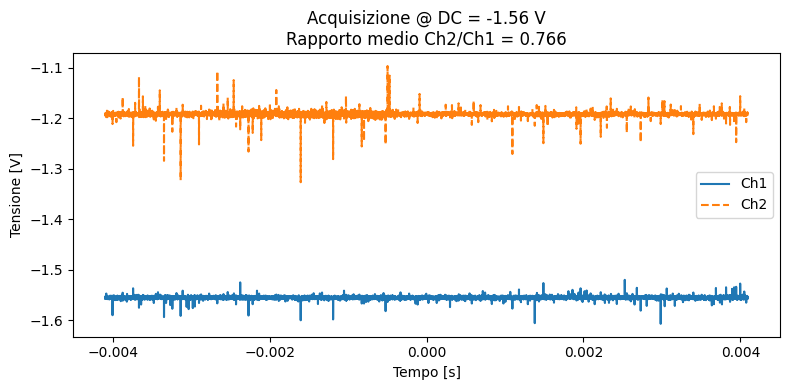


Acquisizione per DC = -1.11 V
Rapporto medio Ch2/Ch1 = 0.766


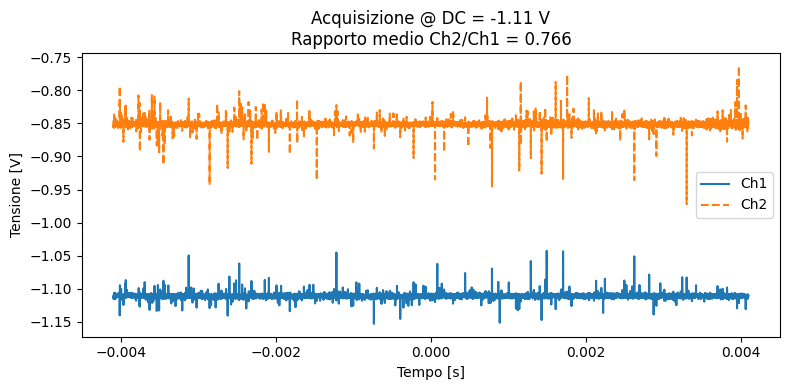


Acquisizione per DC = -0.67 V
Rapporto medio Ch2/Ch1 = 0.766


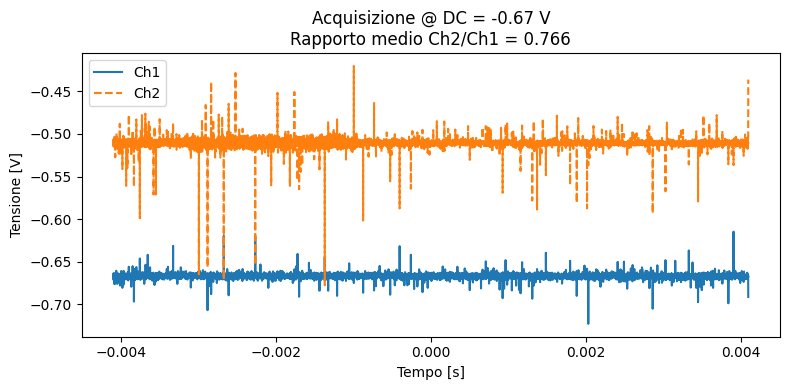


Acquisizione per DC = -0.22 V
Rapporto medio Ch2/Ch1 = 0.764


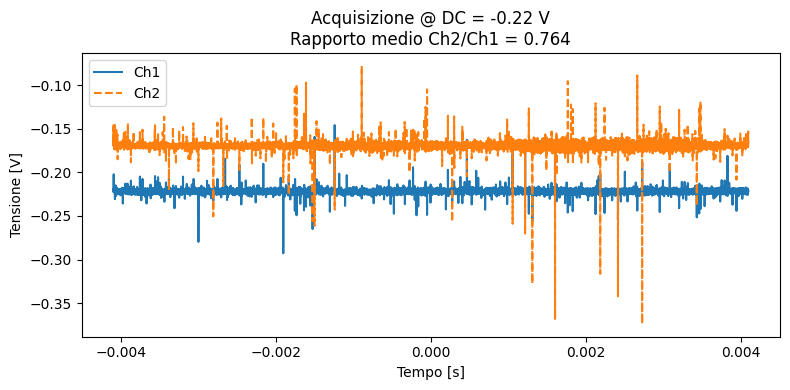


Acquisizione per DC = 0.22 V
Rapporto medio Ch2/Ch1 = 0.766


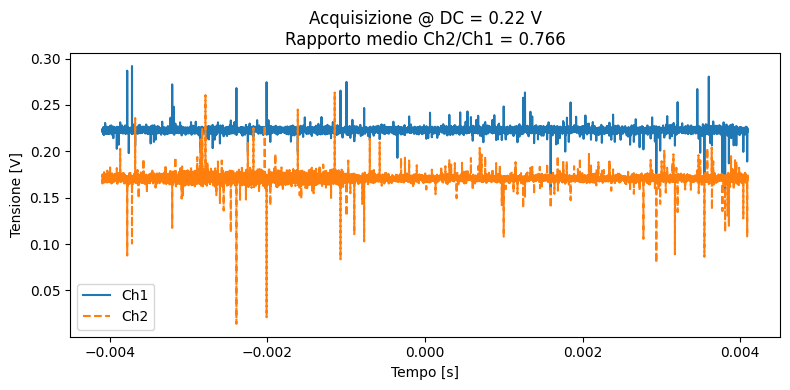


Acquisizione per DC = 0.67 V
Rapporto medio Ch2/Ch1 = 0.766


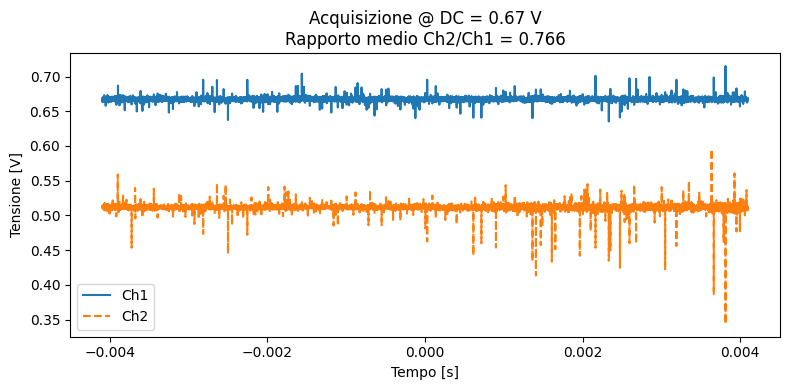


Acquisizione per DC = 1.11 V
Rapporto medio Ch2/Ch1 = 0.767


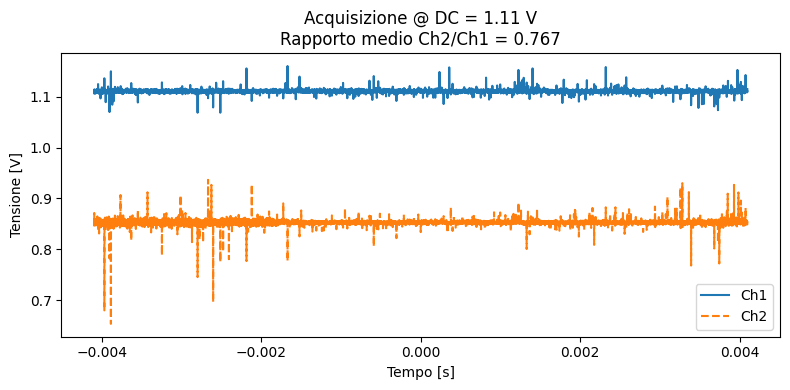


Acquisizione per DC = 1.56 V
Rapporto medio Ch2/Ch1 = 0.767


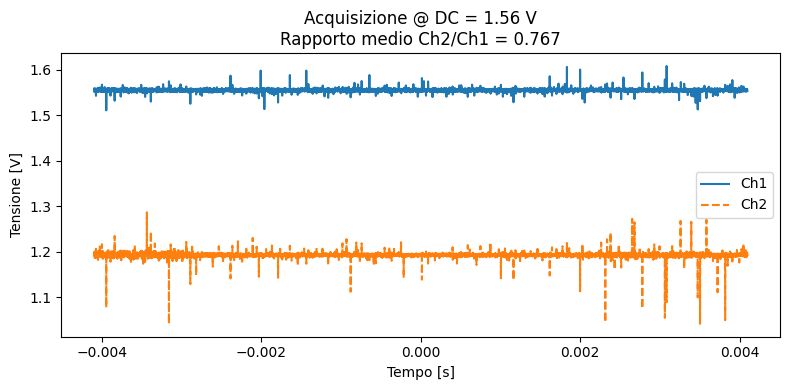


Acquisizione per DC = 2.00 V
Rapporto medio Ch2/Ch1 = 0.767


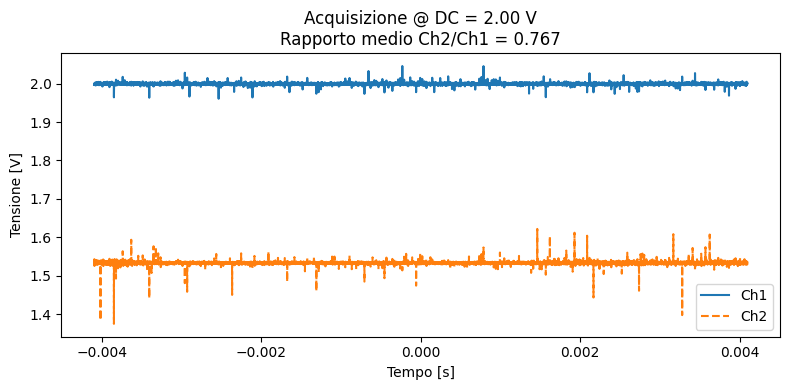

In [ ]:
import tdwf
import matplotlib.pyplot as plt
import numpy as np
import time

# connessione hardware
ad2 = tdwf.AD2()

# Oscilloscopio
scope = tdwf.Scope(ad2.hdwf)
scope.fs = 1e6     # frequenza di campionamento
scope.npt = 8192   # numero di punti
scope.ch1.rng = 5  # range CH1 (±2.5 V)
scope.ch2.rng = 5  # range CH2 (±2.5 V) -> stessa scala
scope.ch1.avg = False

# Generatore
wgen = tdwf.WaveGen(ad2.hdwf)

# Valori di DC da testare
dc_values = np.linspace(-2, 2, 10)   # 10 valori tra 0.2 e 2 V (evito lo 0 per divisione)
ratios = []  # lista per salvare i rapporti

for vdc in dc_values:
    print(f"\nAcquisizione per DC = {vdc:.2f} V")

    # Configuro generatore
    wgen.w1.config(offs=vdc, func=tdwf.funcDC)
    wgen.w1.start()
    time.sleep(0.2)  # tempo di assestamento

    # Acquisizione
    scope.sample()

    t = scope.time.vals
    ch1 = scope.ch1.vals
    ch2 = scope.ch2.vals

    # Calcolo rapporto medio evitando divisione per zero
    valid = ch1[np.abs(ch1) > 1e-6]   # tolgo eventuali punti ~0
    ratio = np.mean(ch2[np.abs(ch1) > 1e-6] / valid)
    ratios.append((vdc, ratio))
    print(f"Rapporto medio Ch2/Ch1 = {ratio:.3f}")

    # Salvo i dati in un file txt
    fname = f"acq_{vdc:.2f}V.txt"
    np.savetxt(fname, np.column_stack((t, ch1, ch2)),
               header="time[s] ch1[V] ch2[V]", comments="")

    # Plot singolo
    plt.figure(figsize=(8,4))
    plt.plot(t, ch1, label="Ch1")
    plt.plot(t, ch2, '--', label="Ch2")
    plt.xlabel("Tempo [s]")
    plt.ylabel("Tensione [V]")
    plt.title(f"Acquisizione @ DC = {vdc:.2f} V\nRapporto medio Ch2/Ch1 = {ratio:.3f}")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Stop generatore
wgen.w1.stop()

# Salvo i rapporti in un file txt riassuntivo
np.savetxt("rapporti.txt", np.array(ratios),
           header="DC[V]   Rapporto_Ch2/Ch1", comments="")


Per descrivere la distribuzione dei dati, di seguito il codice matlab e i grafici:

% --- Setup Iniziale ---

clear all;

close all; % Chiude eventuali figure aperte

clc;       % Pulisce la Command Window

% --- Caricamento e Preparazione Dati ---

tbl = readtable("dati-per-distribuzioni.txt");

% Rinominiamo le colonne della tabella per chiarezza

tbl.Properties.VariableNames = ["timestamp", "Ch1", "Ch2"];


% =================================================================

% Analisi e Grafico per il Canale 1 (Ch1)

% =================================================================

figure; % APRE UNA NUOVA FINESTRA PER IL PRIMO GRAFICO

% Calcola la minima distanza tra i valori unici per definire i bin

dx1 = min(diff(unique(tbl.Ch1)));


% Definisce i bordi dei bin in modo che siano centrati sui valori misurati

bin_edges1 = (min(tbl.Ch1) - dx1/2) : dx1 : (max(tbl.Ch1) + dx1/2);

% Crea l'istogramma usando i bordi dei bin calcolati

histogram(tbl.Ch1, 'BinEdges', bin_edges1);

% Aggiungi etichette e titolo per chiarezza

title('Distribuzione dei Dati del Canale 1');

xlabel('Ch1 [V]');

ylabel('Conteggi (Counts)');

grid on;

% Salva la figura corrente in un file .png ad alta risoluzione

exportgraphics(gcf, 'Distribuzione_Ch1.png', 'Resolution', 300);


% =================================================================

% Analisi e Grafico per il Canale 2 (Ch2)

% =================================================================

figure; % APRE UNA SECONDA FINESTRA PER IL SECONDO GRAFICO

% Calcola la minima distanza tra i valori unici per Ch2

dx2 = min(diff(unique(tbl.Ch2)));

% Definisce i bordi dei bin per Ch2 (usando dx2, non dx1)

bin_edges2 = (min(tbl.Ch2) - dx2/2) : dx2 : (max(tbl.Ch2) + dx2/2);

% Crea il secondo istogramma (usando i dati e i bin di Ch2)

histogram(tbl.Ch2, 'BinEdges', bin_edges2);

% Aggiungi etichette e titolo

title('Distribuzione dei Dati del Canale 2');

xlabel('Ch2 [V]');

ylabel('Conteggi (Counts)');

grid on;

% Salva la seconda figura in un altro file .png

exportgraphics(gcf, 'Distribuzione_Ch2.png', 'Resolution', 300);

disp('Analisi completata. I grafici sono stati salvati come file PNG.');

<img src='Ch1.png' Width=500>
<img src='Ch2.png' Width=500>

tempi lunghi danno le frequenze basse nella DFT